## Image Recognition with Non-Deep Learning Methods

In this project, we look at a few non-deep learning methods for prediction so that we can compare them with our deep learning model (see "Image Recognition with Keras"). With Keras, we were able to achieve over 98% accuracy on the test set. Let's see how other methods compare.

The classifiers we will use are decision tree, random forrests, gradient boosted stumps, logistic regression, and support vector machine. A KNN classifier was attempted, but proved to be too computationally expensive for my laptop.

In [106]:
import pandas as pd
import numpy as np
import mnist
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Data

The data set is the mnist sample of 60,000 handwritten digits. Each sample is a 28x28 two dimensional array of pixels. Each value in the array is the pixel value and the position in the array represents the position in the actual 2D space where the digit was written.

In our data set, the two dimensional data points are flattened to a one dimensional array of 28x28=784 points. The target set denotes what digit the sample represents, 0-9. Thus, there are ten categories for the target set. Using one-hot-encoding, the target set becomes an array of 10 elements.

The test set is designed, specifically, so that none of the images was drawn by any of the drawers used in the train set.

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
X_train=mnist.train.images
y_train=mnist.train.labels

X_valid=mnist.validation.images
y_valid=mnist.validation.labels

X_test=mnist.test.images
y_test=mnist.test.labels

In [4]:
#View the shapes of the data sets
print("Shapes")
print("X_train: {}\ny_train: {}\nX_valid: {}\ny_valid: {}\nX_test: {},\ny_test: {}".format(X_train.shape,
                                                                                      y_train.shape,
                                                                                      X_valid.shape,
                                                                                      y_valid.shape,
                                                                                      X_test.shape,
                                                                                      y_test.shape))

Shapes
X_train: (55000, 784)
y_train: (55000, 10)
X_valid: (5000, 784)
y_valid: (5000, 10)
X_test: (10000, 784),
y_test: (10000, 10)


## Single Decision Tree

In [17]:
max_depth_list=[10,30,50,100]

In [16]:
trees=[DecisionTreeClassifier(random_state=0,max_depth=depth).fit(X_train,y_train) for depth in max_depth_list]

In [19]:
for i in range(len(max_depth_list)):
    print("\n\nMax depth: {}".format(max_depth_list[i]))
    print("Train Accuracy: {}\nValidation Accuracy: {}".format(trees[i].score(X_train,y_train),
                                                               trees[i].score(X_valid,y_valid)))



Max depth: 10
Train Accuracy: 0.8777454545454545
Validation Accuracy: 0.8402


Max depth: 30
Train Accuracy: 0.9982727272727273
Validation Accuracy: 0.8812


Max depth: 50
Train Accuracy: 0.9999818181818182
Validation Accuracy: 0.8752


Max depth: 100
Train Accuracy: 1.0
Validation Accuracy: 0.873


We see that we may be overfitting somewhere arround max_depth=30 and above. Let's try a few more values below about 30.

In [20]:
max_depth_list2=[5,10,15,20,25,30,35]

In [21]:
trees2=[DecisionTreeClassifier(random_state=0,max_depth=depth).fit(X_train,y_train) for depth in max_depth_list2]

In [24]:
train_scores2=[tree.score(X_train,y_train) for tree in trees2]
valid_scores2=[tree.score(X_valid,y_valid) for tree in trees2]

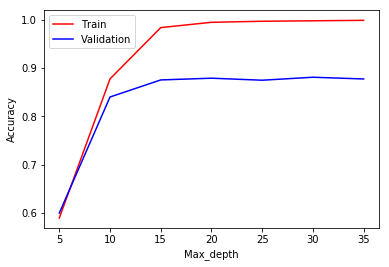

In [25]:
plt.plot(max_depth_list2,train_scores2,"-",color="red",label="Train")
plt.plot(max_depth_list2,valid_scores2,"-",color="blue",label="Validation")
plt.xlabel("Max_depth")
plt.ylabel("Accuracy")
plt.legend()

We see that overfitting occurs arround max_depth of 10. Let's fit a few more models around 10. In any case, we see that our best validation accuracy is significantly less than what we can achieve with a deep learning model. Let's choose depth of 10 as our model determine the accuracy on the test set. 

We also note that overfitting is a significant problem with the decision tree. Perhaps our next step should be to look at random forrests and boosted ensembles of tree stumps.

In [35]:
trees2[1].score(X_test,y_test)

0.84489999999999998

## Random Forests

As we observed previously, a single tree is prone to overfitting. To avoid this, we can consider a random forrest. 

In [37]:
forest=RandomForestClassifier(n_estimators=5,random_state=2)

In [38]:
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [39]:
print("Train Accuracy: {}\nValidation Accuracy: {}".format(forest.score(X_train,y_train),
                                                          forest.score(X_valid,y_valid)))

Train Accuracy: 0.9861272727272727
Validation Accuracy: 0.8814


We have achieved better accuracy than the single tree, as expected, but we might still be over fitting and we are still at a much lower accuracy than the deep learning model. Let's adjust our parameters to see how high we can get our accuracy before moving on to boosted stumps.

In [40]:
estimators=[5,20,50,100,500]

In [41]:
forests=[RandomForestClassifier(n_estimators=estimator,random_state=2).fit(X_train,y_train) for estimator in estimators]

In [43]:
train_score_forest=[forest.score(X_train,y_train) for forest in forests]
validation_score_forest=[forest.score(X_valid,y_valid) for forest in forests]

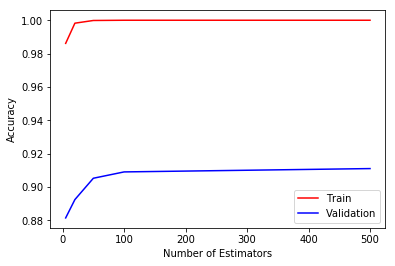

In [44]:
plt.plot(estimators,train_score_forest,"-",color="red",label="Train")
plt.plot(estimators,validation_score_forest,"-",color="blue",label="Validation")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.legend()

Looks like our accuracy maxed out at around 100 estimators. It also looks like we are overfitting at this point. Let's choose the 100 estimator random forrest and test our accuracy on the test set.

In [45]:
forests[3].score(X_test,y_test)

0.90210000000000001

90% accuracy is better than with the single tree but not nearly as good as the deep learning neural network. Let's try gradient boosted stumps to see if we can avoid the overfitting we see with the random forests.

## Gradient Boosted Stumps

In [47]:
#Let's begin with the default setting of 100 trees, maximum depth 3 and learning rate of 0.1
gbt=GradientBoostingClassifier(random_state=2)

Before we can fit our model, we need to reverse the one-hot-encoding. We will do this by creating three different functions, which we can apply to the train, valid and test sets (as pandas data frames), respectively.

In [59]:
y_train_df=pd.DataFrame(y_train)
y_valid_df=pd.DataFrame(y_valid)
y_test_df=pd.DataFrame(y_test)

In [56]:
#Create a function that can be applied to the y_train dataframe to undue the one hot encoding
def get_class_train(row):
    for column in y_train_df.columns:
        if int(row[column])==1:
            return column

In [57]:
#Create a function that can be applied to the y_valid dataframe to undue the one hot encoding
def get_class_valid(row):
    for column in y_valid_df.columns:
        if int(row[column])==1:
            return column

In [58]:
#Create a function that can be applied to the y_test dataframe to undue the one hot encoding
def get_class_test(row):
    for column in y_test_df.columns:
        if int(row[column])==1:
            return column

In [60]:
#Train
y_train_classes=pd.DataFrame(y_train).apply(get_class_train,axis=1)
y_valid_classes=pd.DataFrame(y_valid).apply(get_class_valid,axis=1)
y_test_classes=pd.DataFrame(y_test).apply(get_class_valid,axis=1)

In [61]:
gbt.fit(X_train,y_train_classes)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=2, subsample=1.0, verbose=0,
              warm_start=False)

In [62]:
print("Train Accuracy: {}\nValidation Accuracy: {}".format(gbt.score(X_train,y_train_classes),
                                                           gbt.score(X_valid,y_valid_classes)))

Train Accuracy: 0.9619090909090909
Validation Accuracy: 0.9472


Let's adjust the learning rate to increase complexity.

In [65]:
learn_rates=[0.5,1]
gbt_lr_list=[GradientBoostingClassifier(learning_rate=lr,random_state=2).fit(X_train,y_train_classes) for lr in learn_rates]

In [66]:
print("Train Accuracy: {}\nValidation Accuracy: {}".format(gbt_lr_list[0].score(X_train,y_train_classes),
                                                           gbt_lr_list[0].score(X_valid,y_valid_classes)))
print("Train Accuracy: {}\nValidation Accuracy: {}".format(gbt_lr_list[1].score(X_train,y_train_classes),
                                                           gbt_lr_list[1].score(X_valid,y_valid_classes)))

Train Accuracy: 0.9915454545454545
Validation Accuracy: 0.9546
Train Accuracy: 0.9617818181818182
Validation Accuracy: 0.925


In [68]:
gbt3=GradientBoostingClassifier(random_state=2,max_depth=1,n_estimators=300).fit(X_train,y_train_classes)

In [69]:
#Find the accuracy of the latest gbt
print("Train Accuracy: {}\nValidation Accuracy: {}".format(gbt3.score(X_train,y_train_classes),
                                                           gbt3.score(X_valid,y_valid_classes)))

Train Accuracy: 0.9045818181818182
Validation Accuracy: 0.9048


This appears to be underfit. Let's try 400 estimators with max_depth 2

In [70]:
gbt4=GradientBoostingClassifier(random_state=2,max_depth=2,n_estimators=400).fit(X_train,y_train_classes)

In [71]:
#Find the accuracy of gbt4
print("Train Accuracy: {}\nValidation Accuracy: {}".format(gbt4.score(X_train,y_train_classes),
                                                           gbt4.score(X_valid,y_valid_classes)))

Train Accuracy: 0.9737818181818182
Validation Accuracy: 0.9572


It appears that gbt4 may not be overfit and that increasing the complexity can result in greater accuracy. However, due to the large amounts of time it takes to train these models, I will stop here. I will choose gbt4 as the best performing gradient boosted tree and check it's performance on the test set.

In [72]:
print("Test Accuracy of gbt4: {}".format(gbt4.score(X_test,y_test_classes)))

Test Accuracy of gbt4: 0.9545


The MNIST website reports literature values of the error to be 7.7 for boosted stumps, 1.26 for products of boosted stumps, and 1.53 for boosted trees having 17 leaves. We see that our results are better than the boosted stumps, but not quite as good as the other two methods.

With cloud computing, I could have reasonably conducted a more thorough parameter search and acquired better results. However, the deep learning method can also achieve these results in very little time on my laptop.

## Linear Classifiers

Next, let's try logistic regression (without preprocessing or feature engineering) and a support vector machine. Due to the large number of features (748), manual feature engineering would be a time consuming method. However, I do imagine that relationships would exist amongst the features. Thus, I suspect a SVM would achieve better results than the logistic regression, but let us compare and contrast both methods.

### Logistic Regression

In [75]:
#Use the default setting of C=1.
logreg=LogisticRegression(random_state=2).fit(X_train,y_train_classes)

In [76]:
print("Train Accuracy:{}\nValidation Accuracy: {}".format(logreg.score(X_train,y_train_classes),
                                                         logreg.score(X_valid,y_valid_classes)))

Train Accuracy:0.9281090909090909
Validation Accuracy: 0.921


It looks like we are underfitting. The parameter C is the inverse of the regularization. Thus, increasing C, will decrease the regularization, which should correspond to a more complex model. Let's try fitting a couple more models.

In [77]:
C_vals=[100,200]
logreg_models=[LogisticRegression(random_state=2,C=C).fit(X_train,y_train_classes) for C in C_vals]

In [79]:
for model in logreg_models:
    print("\nTrain Accuracy:{}\nValidation Accuracy: {}".format(model.score(X_train,y_train_classes),
                                                             model.score(X_valid,y_valid_classes)))


Train Accuracy:0.9318
Validation Accuracy: 0.919

Train Accuracy:0.9320363636363637
Validation Accuracy: 0.9184


In [80]:
#Try again with higher C_vals
C_vals2=[500,1000,1e40]
logreg_models2=[LogisticRegression(random_state=2,C=C).fit(X_train,y_train_classes) for C in C_vals2]

In [81]:
for model in logreg_models2:
    print("\nTrain Accuracy:{}\nValidation Accuracy: {}".format(model.score(X_train,y_train_classes),
                                                             model.score(X_valid,y_valid_classes)))


Train Accuracy:0.9322363636363636
Validation Accuracy: 0.918

Train Accuracy:0.9322727272727273
Validation Accuracy: 0.9168

Train Accuracy:0.9323454545454546
Validation Accuracy: 0.9168


It still appears that we are underfitting, but it is not due to regularization. Let us examine the accuracy on the test set and then move on to the SVM, which might provide us with a more complex and, therefore, more accurate model.

In [83]:
print("Test Accuracy: {}".format(logreg.score(X_test,y_test_classes)))

Test Accuracy: 0.9198


While we have not achieved as high of an accuracy with logistic regression as we have with other models, our roughly 8% error is less than the 12% error that MNIST reports for a 1 layer NN without preprocessing.

### Support Vector Machine

In [94]:
svm_model1=SVC().fit(X_train,y_train_classes)

In [95]:
print("Train Accuracty: {}\nValidation Accuracy: {}".format(svm_model1.score(X_train,y_train_classes),
                                                           svm_model1.score(X_valid,y_valid_classes)))

Train Accuracty: 0.9418363636363636
Validation Accuracy: 0.9468


In [96]:
#Increase complexity
svm_model2=SVC(C=500).fit(X_train,y_train_classes)

In [97]:
print("Train Accuracty: {}\nValidation Accuracy: {}".format(svm_model2.score(X_train,y_train_classes),
                                                           svm_model2.score(X_valid,y_valid_classes)))

Train Accuracty: 0.9997454545454545
Validation Accuracy: 0.9758


This looks like a good fit, but let's see if we can get a higher validation accuracy with a slightly less complex model.

In [98]:
svm_model3=SVC(C=300).fit(X_train,y_train_classes)

In [99]:
print("Train Accuracty: {}\nValidation Accuracy: {}".format(svm_model3.score(X_train,y_train_classes),
                                                           svm_model3.score(X_valid,y_valid_classes)))

Train Accuracty: 0.9992727272727273
Validation Accuracy: 0.9762


In [100]:
svm_model4=SVC(C=100).fit(X_train,y_train_classes)

In [101]:
print("Train Accuracty: {}\nValidation Accuracy: {}".format(svm_model4.score(X_train,y_train_classes),
                                                           svm_model4.score(X_valid,y_valid_classes)))

Train Accuracty: 0.9945818181818182
Validation Accuracy: 0.9764


In [103]:
svm_model5=SVC(C=50).fit(X_train,y_train_classes)

In [104]:
print("Train Accuracty: {}\nValidation Accuracy: {}".format(svm_model5.score(X_train,y_train_classes),
                                                           svm_model5.score(X_valid,y_valid_classes)))

Train Accuracty: 0.9881090909090909
Validation Accuracy: 0.9754


Let's choose the last model as our model of choice and score our test set.

In [105]:
print("Test Accuracy: {}".format(svm_model5.score(X_test,y_test_classes)))

Test Accuracy: 0.9722


The MNIST website reports an error of 1.4%. We didn't do quite as well. However, we did improve our score compared with the logistic regression, as expected, and overall, this is a great score.

## Conclusion

All methods tested, had accuracies that ranged from 84% to 97%. The single decision tree had a test accuracy of 84%. The random forest had improved results of 90%. Using gradient boosted stumps, we achieved an accuracy of 95%. The MNIST website reports a literature result with an error of 7.7% for the gradient boosted stump.

Logistic regression without preprocessing or feature engineering resulted in 92% accuracy. MNIST doesn't report a score for logistic regression, however, they do report an error of 12% for a single layer neural network. Thus, I would assume that our 92% accuracy is up to industry standard.

The support vector machine achieved a higher accuracy, as was expected. We achieved 97% accuracy, which is close to the 98% accuracy we achieved with the deep learning neural network. This is not quite as good as the 98.6% accuracy MNIST reports for the SVM, Gaussian kernal, no preprocessing score.

Although these scores are similar to what has been achieved before, for the respective models, MNIST reports models that have achieved greater than 99% accuracy.